*Notebook source: https://www.kaggle.com/code/serkanpeldek/face-recognition-on-olivetti-dataset*

Note -- This might be better (later change)  
https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html

<hr>

### Load dataset

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [7]:
data, target = fetch_olivetti_faces(return_X_y=True)
data = data.reshape((-1, 64, 64))

### Show image information

In [8]:
print('There are {} images in the dataset'.format(len(data)))
print('There are {} unique targets in the dataset'.format(len(np.unique(target))))
print('Size of each image is {}x{}'.format(data.shape[1],data.shape[2]))
print('Pixel values were scaled to [0,1] interval. e.g:{}'.format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [9]:
print('unique target number:',np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


### Show Image

In [10]:
def show_40_distinct_people(images, unique_ids):

    # Creating 4X10 subplots in 18x9 figure size
    fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(18, 9), facecolor='white')

    # For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr = axarr.flatten()
    
    # Iterate over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title('face id:{}'.format(unique_id))
    plt.suptitle('There are 40 distinct people in the dataset')

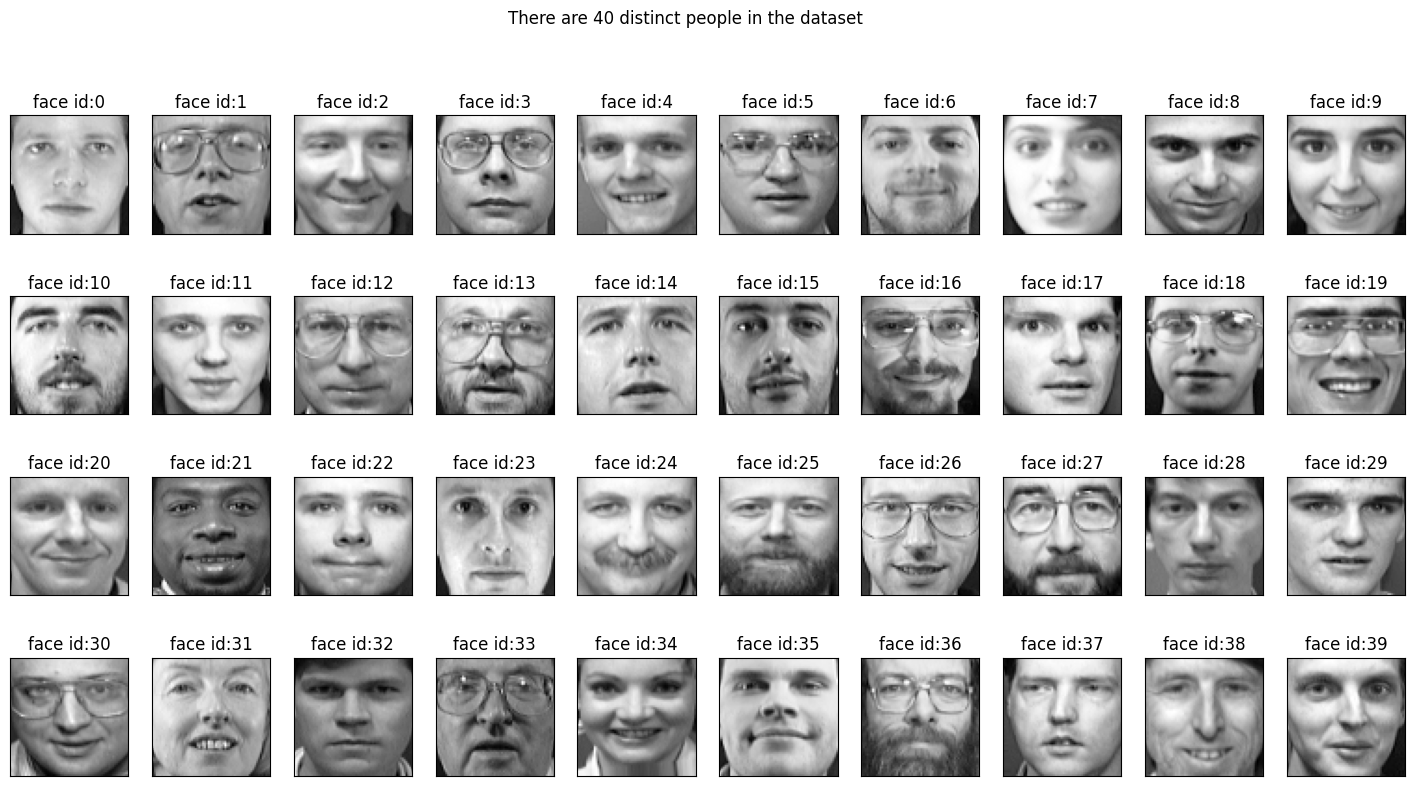

In [11]:
show_40_distinct_people(data, np.unique(target))

### Show target image

In [12]:
def show_10_faces_of_n_subject(images, subject_ids):

    cols=10 # each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols
    rows=int(rows)
    
    fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(18,9), facecolor='white')
    # axarr = axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index = subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap='gray')
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title('face id:{}'.format(subject_id))

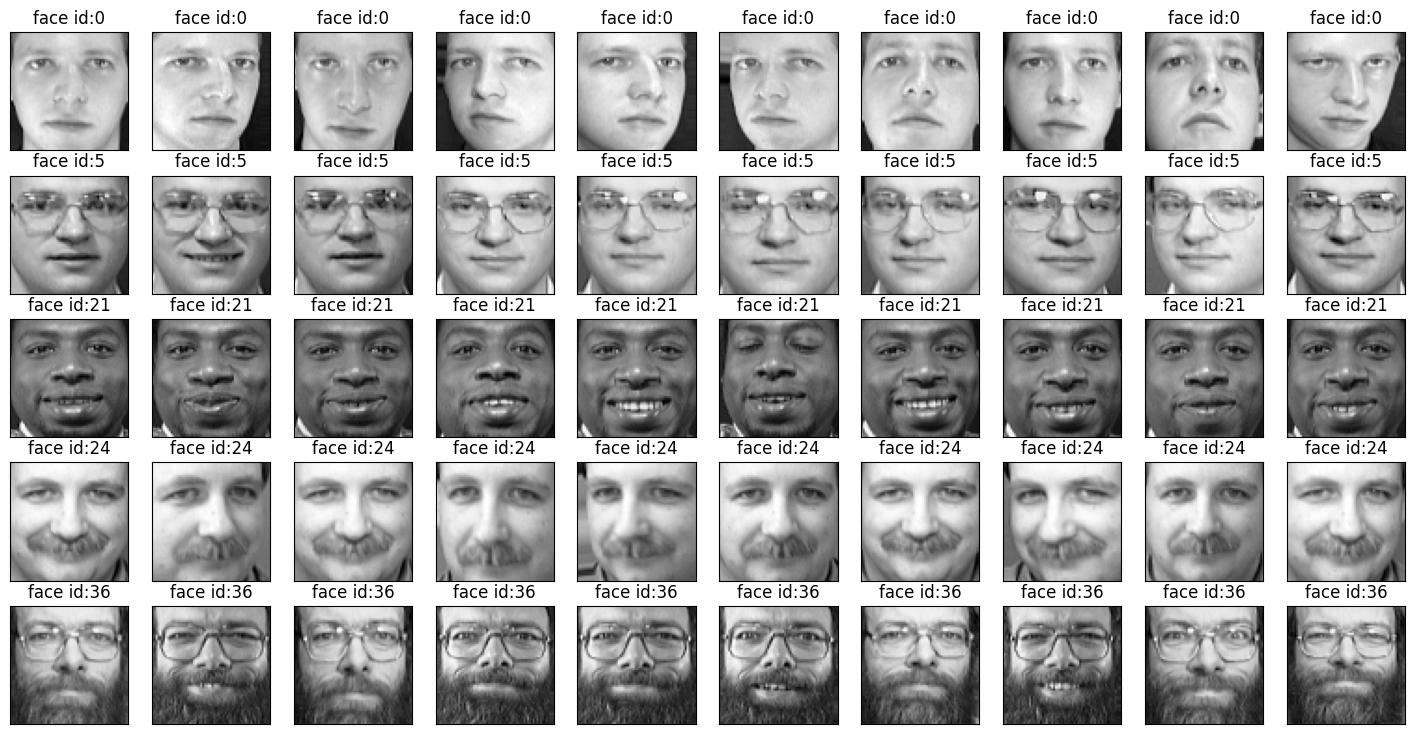

In [13]:
show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 21, 24, 36])

### Prepare dataset for PCA

In [14]:
X = data.reshape((data.shape[0], -1))
print('X shape:', X.shape)

X shape: (400, 4096)


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (280, 4096)
y_train shape: (280,)


<Axes: title={'center': 'Number of Samples for Each Classes'}, xlabel='subject ids'>

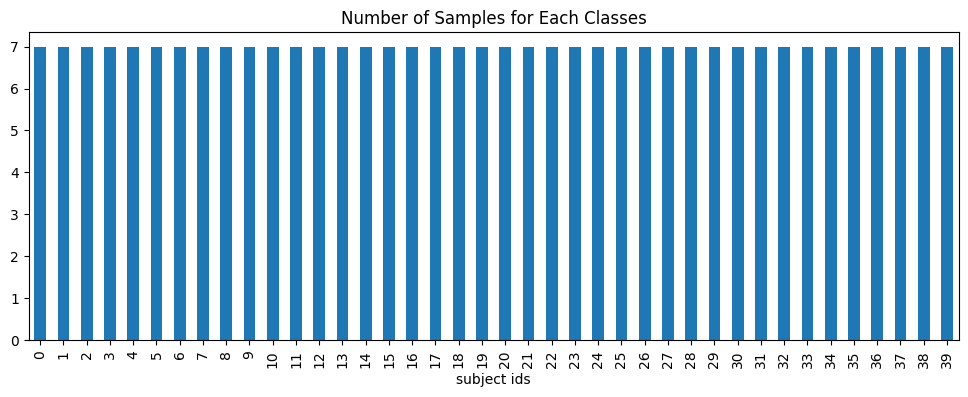

In [97]:
y_frame = pd.DataFrame()
y_frame['subject ids'] = y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(12,4), title='Number of Samples for Each Classes')

In [98]:
# import mglearn
# mglearn.plots.plot_pca_illustration()

# This code blocks shows using fake data, not related to our dataset

In [99]:
from sklearn.preprocessing import StandardScaler
# Scale data before applying PCA
scaling=StandardScaler()

train_mean = np.mean(X_train, axis=0)
X_train = X_train - train_mean
# Use fit and transform method
scaling.fit(X_train)
X_train_scaled=scaling.transform(X_train)
scaling.fit(X_test)
X_test_scaled=scaling.transform(X_test)

In [100]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_pca = pca.transform(X_train_scaled)

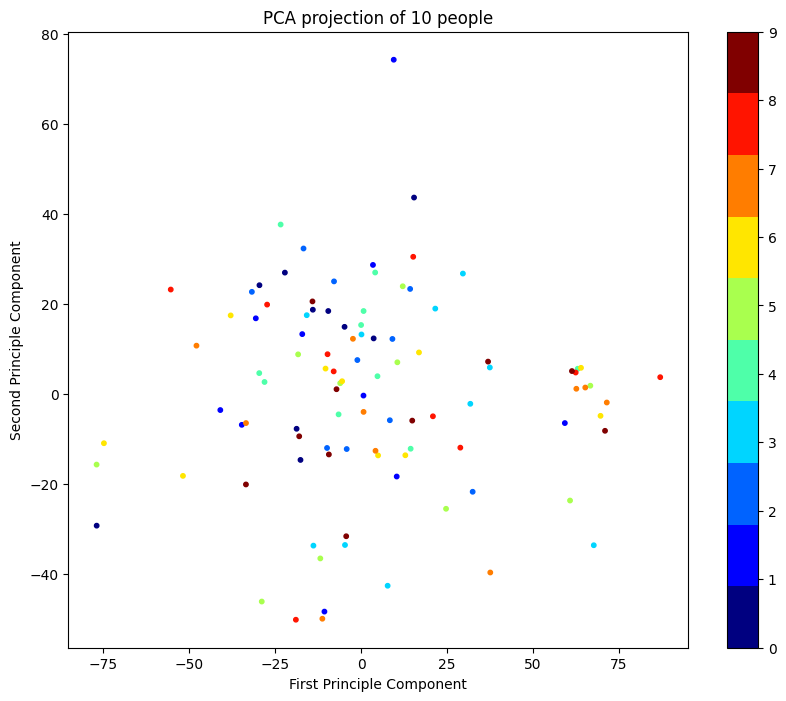

In [101]:
number_of_people = 10
index_range = number_of_people*10

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
scatter = ax.scatter(
    X_pca[:index_range,0],
    X_pca[:index_range,1], 
    c=target[:index_range],
    s=10,
    cmap=plt.get_cmap('jet', number_of_people)
)

ax.set_xlabel('First Principle Component')
ax.set_ylabel('Second Principle Component')
ax.set_title('PCA projection of {} people'.format(number_of_people))
fig.colorbar(scatter)

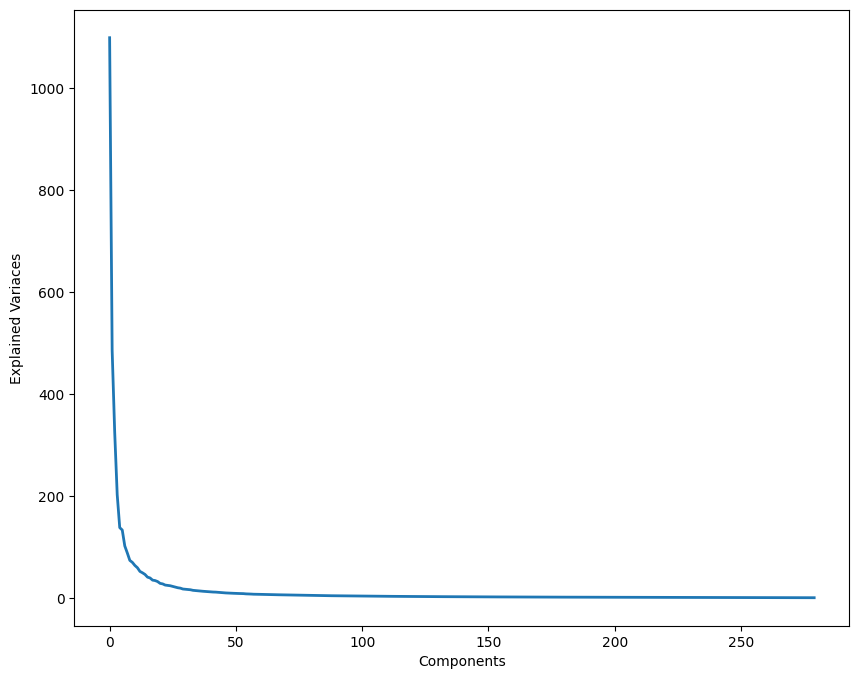

In [102]:
pca = PCA()
pca.fit(X_train_scaled)

plt.figure(1, figsize=(10,8))
plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [103]:
pca = PCA(n_components=90, whiten=True)
pca.fit(X_train_scaled)

PCA(n_components=90, whiten=True)

Text(0.5, 1.0, 'Average Face')

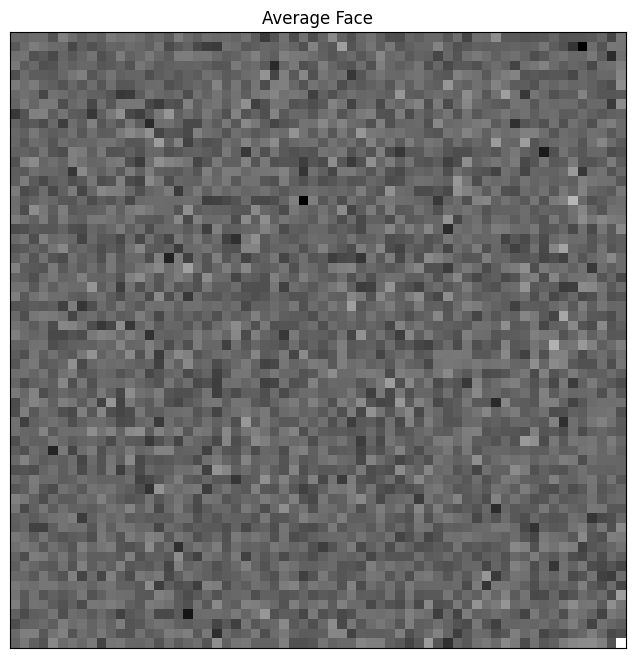

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(8,8), facecolor='white')
ax.imshow(pca.mean_.reshape((64,64)), cmap='gray')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

Text(0.5, 0.98, 'All Eigen Faces')

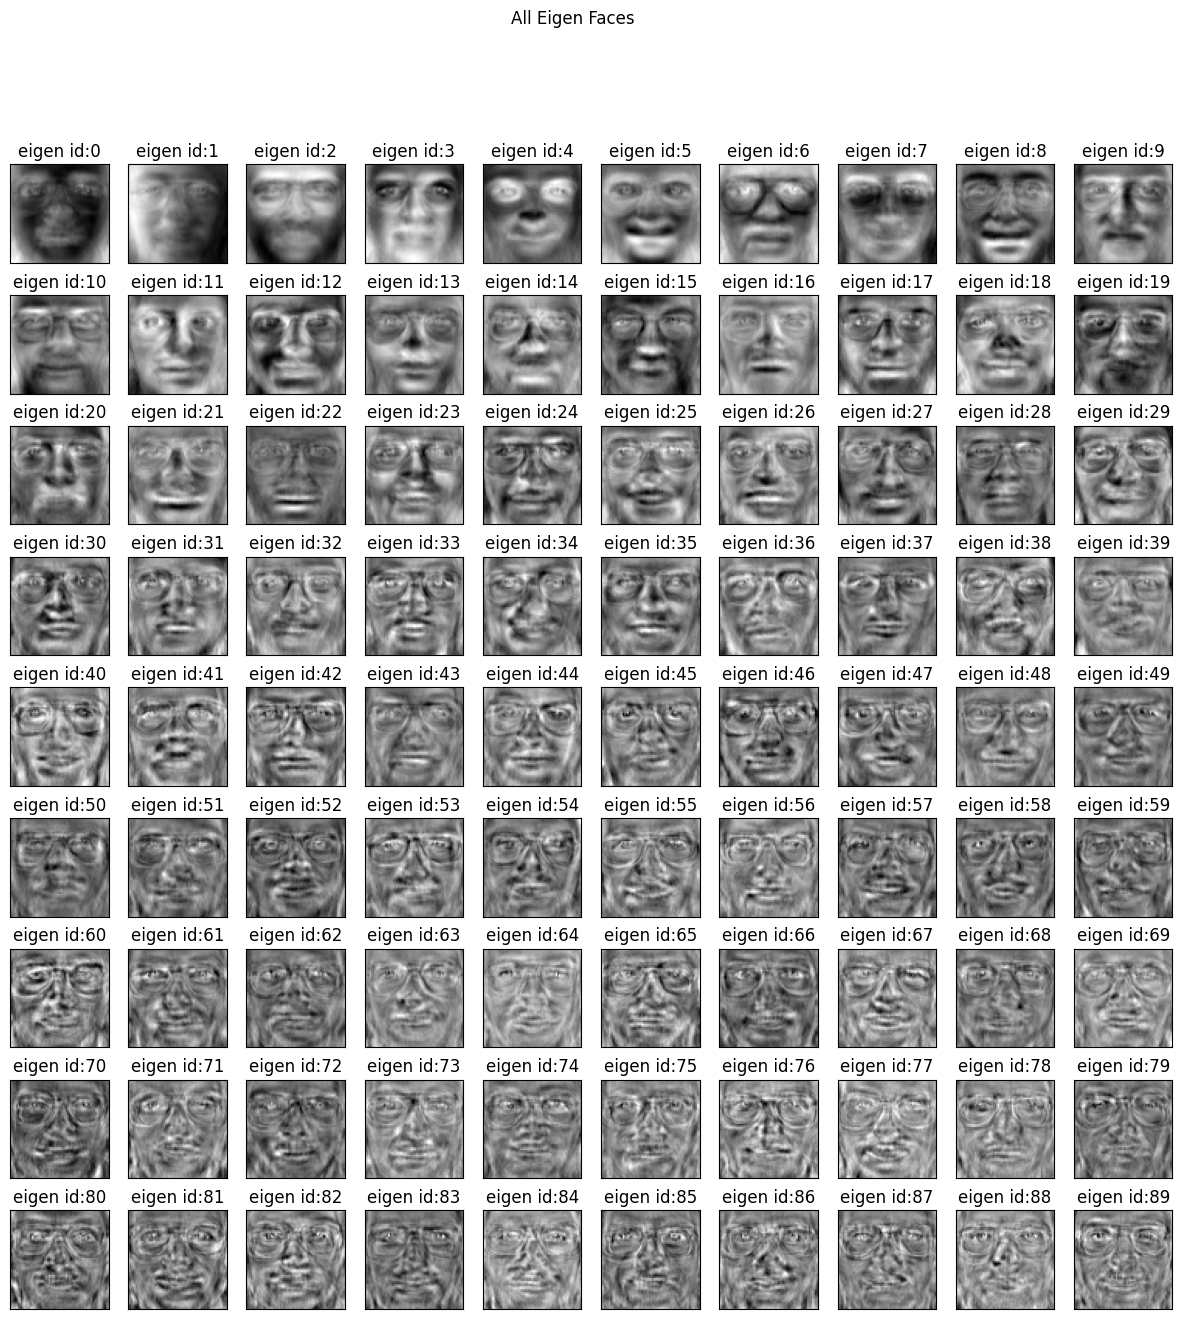

In [105]:
number_of_eigenfaces = len(pca.components_)
eigen_faces = pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols = 10
rows = int(number_of_eigenfaces/cols)
fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15), facecolor='white')
axarr = axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap='gray')
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title('eigen id:{}'.format(i))
plt.suptitle('All Eigen Faces'.format(10*'=', 10*'='))

In [112]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [119]:
print(X_train_pca.shape)
print(y_train.shape)
print(X_test_pca.shape)
print(y_test.shape)

(280, 90)
(280,)
(120, 90)
(120,)


LDA

In [117]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(X_train_pca, y_train)

LinearDiscriminantAnalysis()

In [118]:
X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)

In [81]:
y_pred = lda.predict(X_test_pca) 
print(lda.score(X_test_pca,y_test))

0.9416666666666667


### Machine learning

In [29]:
!pip install keras

In [30]:
!pip install tensorflow

In [83]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation

from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dropout

from keras import regularizers

In [120]:
y_train = to_categorical(y_train, 40)
y_test = to_categorical(y_test, 40)

print(y_train.shape)
print(y_test.shape)

(280, 40)
(120, 40)


In [127]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=39))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(40, activation='softmax'))

epochs = 100
batch_size = 128
red_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=2, verbose=1)
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 256)               10240     
                                                                 
 dropout_27 (Dropout)        (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 128)               32896     
                                                                 
 dropout_28 (Dropout)        (None, 128)               0         
                                                                 
 dense_38 (Dense)            (None, 128)               16512     
                                                                 
 dropout_29 (Dropout)        (None, 128)               0         
                                                                 
 dense_39 (Dense)            (None, 40)               

In [128]:
history = model.fit(X_train_lda, y_train, epochs=epochs, validation_data=(X_test_lda,y_test), batch_size=128, verbose=1)

Epoch 1/100
3/3 [==============================] - 2s 285ms/step - loss: 4.0964 - accuracy: 0.0250 - val_loss: 3.3051 - val_accuracy: 0.1417
Epoch 2/100
3/3 [==============================] - 0s 52ms/step - loss: 3.3353 - accuracy: 0.1000 - val_loss: 2.8992 - val_accuracy: 0.4000
Epoch 3/100
3/3 [==============================] - 0s 101ms/step - loss: 2.8333 - accuracy: 0.3143 - val_loss: 2.5761 - val_accuracy: 0.5750
Epoch 4/100
3/3 [==============================] - 0s 87ms/step - loss: 2.4038 - accuracy: 0.5143 - val_loss: 2.2693 - val_accuracy: 0.6167
Epoch 5/100
3/3 [==============================] - 0s 65ms/step - loss: 2.0901 - accuracy: 0.6036 - val_loss: 1.9647 - val_accuracy: 0.7167
Epoch 6/100
3/3 [==============================] - 0s 48ms/step - loss: 1.7595 - accuracy: 0.7071 - val_loss: 1.6685 - val_accuracy: 0.7667
Epoch 7/100
3/3 [==============================] - 0s 62ms/step - loss: 1.4361 - accuracy: 0.7643 - val_loss: 1.3929 - val_accuracy: 0.8000
Epoch 8/100
3/3 [=

In [35]:
model.save('models/face_rec_keras.h5')

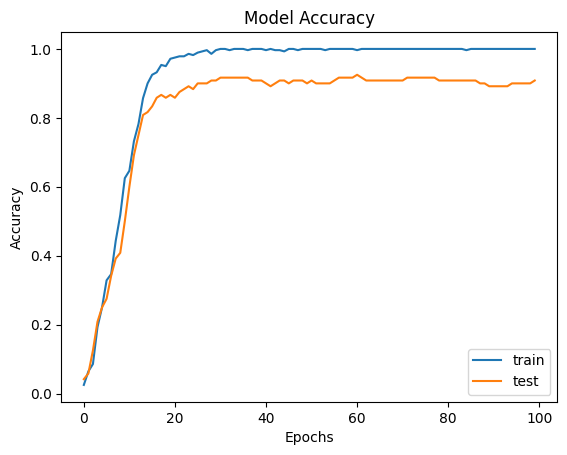

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

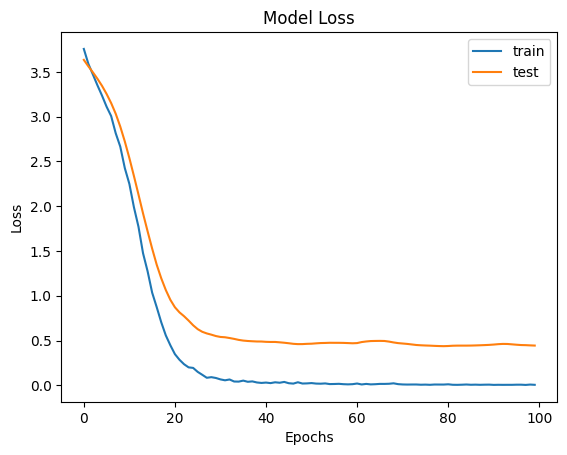

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()